# Usenet Analysis
Written by Casey Martin

Importing tools I might need.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from operator import itemgetter
from pprint import pprint
from datetime import datetime
from wordcloud import WordCloud

Importing data into big honkin' strings

In [3]:
bigcomp = ''
with open(".\\data\\comp.org.acm.txt", encoding='utf-8') as dataIn:
    bigcomp = ''.join(dataIn.readlines())
    
biglinux = ''
with open(".\\data\\linux.dev.kernel.txt", encoding='utf-8') as dataIn:
    biglinux = ''.join(dataIn.readlines())
    
bigarts = ''
with open(".\\data\\rec.arts.origami.txt", encoding='utf-8') as dataIn:
    bigarts = ''.join(dataIn.readlines())
    
bigfood = ''
with open(".\\data\\rec.food.chocolate.txt", encoding='utf-8') as dataIn:
    bigfood = ''.join(dataIn.readlines())
    
bigfract = ''
with open(".\\data\\sci.fractals.txt", encoding='utf-8') as dataIn:
    bigfract = ''.join(dataIn.readlines())

### Question 1: How many messages are in each archive?
To begin, I explored each file to determine what marker I would use to mark a "message". Each unique message consists of "\nFrom (large + or - integer)\n so I need to create a regular expression that allows for an integer of any length. I elected to assume the integer is at least 5 digits long to avoid references to years; "From 1995 until 2006..."

In [4]:
#The regular expression
compstring = r"From -?\d{5}\d*"

Built a function for counting the post using a more general approach that can be reused in the future since it takes in a regular expression as well as a big honkin' string.

In [5]:
def lineGrab(bigstring, filename, comp):
    split = bigstring.split('\n')
    fromList = []
    for word in split:
        m = re.match(comp, word)
        if m:
            fromList.append(word)
        else:
            pass
    print('{0:s}{1:25s}{2:6d}'.format("The number of lines that match within ", filename, len(fromList)))
    return fromList;

Generating lists of grabbed lines.

In [6]:
fromComp = lineGrab(bigcomp, "comp.org.acm.txt", compstring)
fromLinux = lineGrab(biglinux, "linux.dev.kernel.txt", compstring)
fromArts = lineGrab(bigarts, "rec.arts.origami.txt", compstring)
fromFood = lineGrab(bigfood, "rec.food.chocolate.txt", compstring)
fromFract = lineGrab(bigfract, "sci.fractals.txt", compstring)

The number of lines that match within comp.org.acm.txt           6246
The number of lines that match within linux.dev.kernel.txt      34404
The number of lines that match within rec.arts.origami.txt       3549
The number of lines that match within rec.food.chocolate.txt    17616
The number of lines that match within sci.fractals.txt          25733


Creating a list compatible with countplot.

In [7]:
counts = []
for i in range(len(fromComp)):
    counts.append("Comp")
for i in range(len(fromLinux)):
    counts.append("Linux")
for i in range(len(fromArts)):
    counts.append("Arts")
for i in range(len(fromFood)):
    counts.append("Food")
for i in range(len(fromFract)):
    counts.append("Fract")

Numer of posts in comp.org.acm.txt       6246
Numer of posts in linux.dev.kernel.txt   34404
Numer of posts in rec.arts.origami.txt   3549
Numer of posts in rec.food.chocolate.txt 17616
Numer of posts in sci.fractals.txt       25733


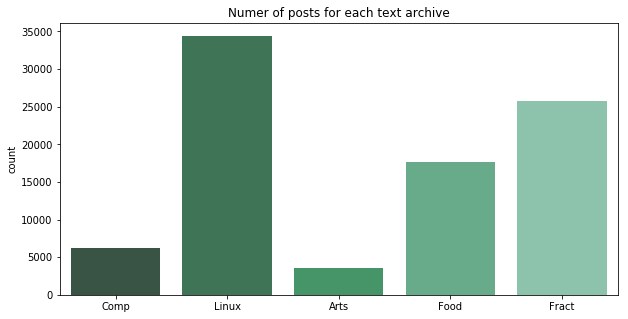

In [8]:
plt.rcParams['figure.figsize']=(10,5)
cp = sns.countplot(counts,  palette="BuGn_d")
cp.set_title("Numer of posts for each text archive")
print("Numer of posts in comp.org.acm.txt      ", len(fromComp))
print("Numer of posts in linux.dev.kernel.txt  ", len(fromLinux))
print("Numer of posts in rec.arts.origami.txt  ", len(fromArts))
print("Numer of posts in rec.food.chocolate.txt", len(fromFood))
print("Numer of posts in sci.fractals.txt      ", len(fromFract))

### Question 1: Discussion
Clearly, this method of communication was much more popular among the Linux community than the Art community. I think this assertion is appropriate given that the Art community is almost certainly larger.

### Question 2: For each archive, what is the average number of lines per message?
I should be able to use my previously defined function to find the Lines: line, only with a different regular expression. General shape: \nLines: (integer)\n

In [9]:
compstring = r"Lines: \d+"
fromComp = lineGrab(bigcomp, "comp.org.acm.txt", compstring)
fromLinux = lineGrab(biglinux, "linux.dev.kernel.txt", compstring)
fromArts = lineGrab(bigarts, "rec.arts.origami.txt", compstring)
fromFood = lineGrab(bigfood, "rec.food.chocolate.txt", compstring)
fromFract = lineGrab(bigfract, "sci.fractals.txt", compstring)

The number of lines that match within comp.org.acm.txt           3967
The number of lines that match within linux.dev.kernel.txt       2073
The number of lines that match within rec.arts.origami.txt       1224
The number of lines that match within rec.food.chocolate.txt     5832
The number of lines that match within sci.fractals.txt          14270


In [10]:
def countAvg(name, list1):
    total = 0
    for i in range(len(list1)):
        total+=int(list1[i].split(" ")[1])
    names.append(name)
    averages.append(total/i)

Defined a function to simplify the following section. It is not entirely self contained, though.

In [11]:
names = []
averages = []
countAvg('Comp',fromComp)
countAvg('Linux', fromLinux)
countAvg('Arts', fromArts)
countAvg('Food', fromFood)
countAvg('Fract', fromFract)

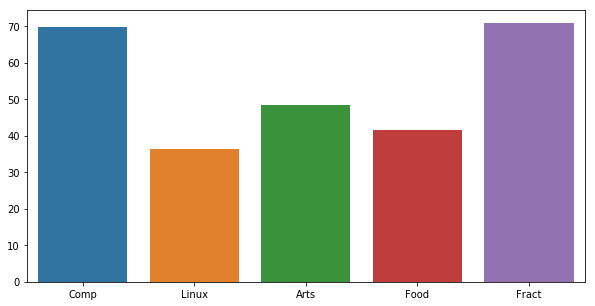

In [12]:
sns.barplot(names, averages)

### Question 2: Discussion
Comp and Fractals tend to have much more lines per post than the others.

### Question 3: Who were the top 5 posters in each group?
To check this, I am choosing to base the person on their email address. So "David C. Ullrich" and David Ullrich will be considered the same person so long as their email addresses match. People who have no email address will be identified by their given username.

In [13]:
compstring = r"From: "
fromComp = lineGrab(bigcomp, "comp.org.acm.txt", compstring)
fromLinux = lineGrab(biglinux, "linux.dev.kernel.txt", compstring)
fromArts = lineGrab(bigarts, "rec.arts.origami.txt", compstring)
fromFood = lineGrab(bigfood, "rec.food.chocolate.txt", compstring)
fromFract = lineGrab(bigfract, "sci.fractals.txt", compstring)

The number of lines that match within comp.org.acm.txt           6295
The number of lines that match within linux.dev.kernel.txt      34887
The number of lines that match within rec.arts.origami.txt       3562
The number of lines that match within rec.food.chocolate.txt    17732
The number of lines that match within sci.fractals.txt          25950


Creating another function to help me count the names and strip off extraneous stuff.

In [14]:
def nameCounter(list1):
    tempDict = {}
    for line in list1:
        prename = line.split(":")[1]
        m = re.search(r".?[A-Za-z0-9]+@[A-Za-z0-9]+\.[A-Za-z0-9]+", prename)
        if m:
            name = prename.split("<")[0].strip(' ').strip('"')
            if name in tempDict:
                tempDict[name] += 1
            else:
                tempDict[name] = 1           
        else:
            pass
    return tempDict
    

In [15]:
compDict = nameCounter(fromComp)
linuxDict = nameCounter(fromLinux)
artsDict = nameCounter(fromArts)
foodDict = nameCounter(fromFood)
fractDict = nameCounter(fromFract)

In [16]:
sortComp = sorted(compDict.items(),key=itemgetter(1), reverse=True)
sortLinux = sorted(linuxDict.items(),key=itemgetter(1), reverse=True)
sortArts = sorted(artsDict.items(),key=itemgetter(1), reverse=True)
sortFood = sorted(foodDict.items(),key=itemgetter(1), reverse=True)
sortFract = sorted(fractDict.items(),key=itemgetter(1), reverse=True)

In [17]:
print("Top 5 Posters in Comp:\n")
for thing in sortComp[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

print("Top 5 Posters in Linux:\n")
for thing in sortLinux[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

print("Top 5 Posters in Arts:\n")
for thing in sortArts[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

print("Top 5 Posters in Food:\n")
for thing in sortFood[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

print("Top 5 Posters in Fract:\n")
for thing in sortFract[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

Top 5 Posters in Comp:

cb@sei.cmu.edu (Carol Biesecker)             148
toni@usenix.org (Toni Veglia)                88
Joe Katz                                     80
natty2006@gmail.com                          78
faigin@aero.org (Daniel P. Faigin)           77


Top 5 Posters in Linux:

Alan Cox                                     506
Ulrich Windl                                 451
Bryn Paul Arnold Jones                       438
Linus Torvalds                               420
alan@lxorguk.ukuu.org.uk (Alan Cox)          329


Top 5 Posters in Arts:

Matthias Gutfeldt                            267
John Andrisan                                195
zbrown@lynx.dac.neu.edu (Zachary Brown)      163
Robin King                                   65
contract@pipeline.com (Marc Kirschenbaum)    59


Top 5 Posters in Food:

ad.rast.7@nwnotlink.NOSPAM.com (Alex Rast)   270
Mark Thorson                                 185
Johnson                                      168
Janet Puistonen      

### Question 3: Discussion
Yep, those are the top posters! Roger Bagula talks a lot. Also, there are a ton of terrorist threats and solicitation in the Fractals file.

### Question 4: Which mail programs were most popular for sending messages to Usenet?
Need to concatenate the big honkin strings into one cosmic superstring, then search for User-Agent: and X-Http-User-Agent with a regular expression and grab everything before the ( if applicable, since the contents of the () changes.

In [18]:
compstring = r".*User-Agent: "
superstring = bigcomp + biglinux + bigarts + bigfood + bigfract
fromSuper = lineGrab(superstring, "all files", compstring)

The number of lines that match within all files                  9414


In [19]:
superDict = {}
for line in fromSuper:
    name = line.split("(")[0].split("/")[0].split(":")[1]
    name = re.search(r"\s?[A-Za-z]+[0-9]*(\s?[A-Za-z]*)*",name)
    if name:
        name = name.group(0).strip(" ")
        if name in superDict:
            superDict[name] += 1
        else:
            superDict[name] = 1     
    else:
        pass
else:
    pass

The regular expression above grabs a few items that are incorrect but is accurate enough that the most common occurances should be correct, though "Mozilla", "Mozilla Thunderbird", and "Thunderbird" are all counted separately. It does ignore version numbers, so Thunderbird 1.2.3.4 and Thunderbird 2.3.4.5 are counted the as the same user agent.

In [20]:
sortSuper = sorted(superDict.items(),key=itemgetter(1), reverse=True)
print("Top 5 User Agents are:\n")
for thing in sortSuper[:5]:
    print('{0:45s}{1:d}'.format(thing[0],thing[1]))
print('\n')

Top 5 User Agents are:

G2                                           3354
Mozilla                                      2279
Mozilla Thunderbird                          922
Xnews                                        450
tin                                          380




### Question 4: Discussion
I noticed that many entries contained no User-Agent at all and some contained both User-Agent and X-HTTP-User Agent that didn't match, so I am unsure exactly how accurate this result is. However, it appears that the most common user agents are G2, Mozilla, and Mozilla Thunderbird. The counts are probably off because Mozilla and Mozilla Thunderbird and Thunderbird may actually be part of the same family of User-Agents, but I am not sure.

### Question 5: As the World Wide Web grew, use of Usenet fell. Does our data support this statement?
I need to count the number of posts in each year by extracting the year from the Date: header and translating them into a consistent format. Here are the way dates are formatted: "5 Jul 2006 06:55:44 -0700", "28 Jul 92 02:12:03 GMT", "1995/06/22", "Thu, 9 Mar 1995 14:04:54 -0800", and "5 May 02 14:04:54" so the regular expression accounts for all of those possibilities.

In [21]:
compstring = r"^Date:.*"
fromComp = lineGrab(bigcomp, "comp.org.acm.txt", compstring)
fromLinux = lineGrab(biglinux, "linux.dev.kernel.txt", compstring)
fromArts = lineGrab(bigarts, "rec.arts.origami.txt", compstring)
fromFood = lineGrab(bigfood, "rec.food.chocolate.txt", compstring)
fromFract = lineGrab(bigfract, "sci.fractals.txt", compstring)

The number of lines that match within comp.org.acm.txt           6323
The number of lines that match within linux.dev.kernel.txt      34690
The number of lines that match within rec.arts.origami.txt       3564
The number of lines that match within rec.food.chocolate.txt    17663
The number of lines that match within sci.fractals.txt          25943


The cell below matches Date: and looks for a four or two digit valid year (no 1800s, no 2100s, etc.). For two digit codes, it appends the 19 or 20 to it to convert it to a four digit year.

In [22]:
def yearCounter(lines):
    tempDict = {}
    for line in lines:
        name = re.search(r"(199[0-9]|20[01][0-9])|[9][0-9]|[0][0-9]",line)
        if name:
            if re.match(r"[12][09][09][0-9]", name[0]):
                if name[0] in tempDict:
                    tempDict[name[0]] += 1
                else:
                    tempDict[name[0]] = 1
            elif re.match(r"[9][0-9]",name[0]):
                name2 = "19" + name[0]
                if name2 in tempDict:
                    tempDict[name2] += 1
                else:
                    tempDict[name2] = 1
            elif re.match(r"[0][0-9]", name[0]):
                name2 = "20" + name[0]
                if name2 in tempDict:
                    tempDict[name2] += 1
                else:
                    tempDict[name2] = 1
        else:
            pass
        for i in ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                  '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                  '2010','2011']:
            if i not in tempDict:
                tempDict[i] = 0
    return tempDict

In [23]:
yearComp = yearCounter(fromComp)
yearLinux = yearCounter(fromLinux)
yearArts = yearCounter(fromArts)
yearFood = yearCounter(fromFood)
yearFract = yearCounter(fromFract)

The cell below converts the dictionary to a sorted list which is placed in a superlist which is iterated over to print the damn thing on one graph.

Text(15,11000,'Grey:     Fractals')

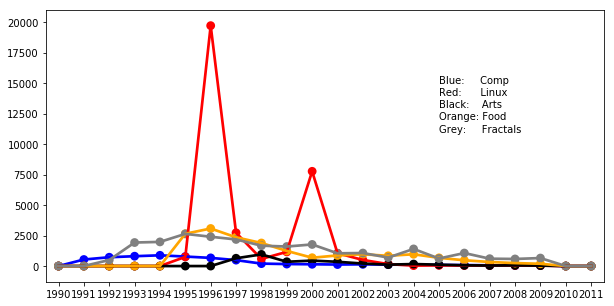

In [25]:
sortSuper = []
sortComp = sorted(yearComp.items(),key=itemgetter(1), reverse=True)
sortLinux = sorted(yearLinux.items(),key=itemgetter(1), reverse=True)
sortArts = sorted(yearArts.items(),key=itemgetter(1), reverse=True)
sortFood = sorted(yearFood.items(),key=itemgetter(1), reverse=True)
sortFract = sorted(yearFract.items(),key=itemgetter(1), reverse=True)
sortSuper = [sortComp, sortLinux, sortArts, sortFood, sortFract]

pSuper = []
pLinux = [[],[]]
pComp = [[],[]]
pArts = [[],[]]
pFood = [[],[]]
pFract = [[],[]]
pSuper = [pComp, pLinux, pArts, pFood, pFract]
for i in range(len(pSuper)):
    for j in range(len(sortSuper[i])):
        pSuper[i][0].append(sortSuper[i][j][0])
        pSuper[i][1].append(sortSuper[i][j][1])
        
colist = ["blue", "red", "black", "orange", "grey"]    
for i in range(len(pSuper)):
    ax = sns.pointplot(pSuper[i][0],pSuper[i][1], color = colist[i])
ax.text(15,15000, "Blue:     Comp")
ax.text(15,14000, "Red:      Linux")
ax.text(15,13000, "Black:    Arts")
ax.text(15,12000, "Orange:   Food")
ax.text(15,11000, "Grey:     Fractals")

### Question 5: Discussion
Aside from the rather extreme spikes in the Linux community, there is a fairly smooth and clear upward trend until the mid-late 90s, then a clear downward trend into the 2000s. The spikes in the linux community seemed to coincide with the introduction of Tux the penguin in 1996 and the creation of the Open Source Development Lab and Linux Foundation in 2000. However, these are only five Usenet message lists and there are a great many more than that. Our data supports our assertion but is not defacto proof; we would need to check more than just five datasets before we could assert with any real certainty that use of usenet has declined as the WWW has gained popularity.

For reference, the internet started exploding in popularity in the late 90s, specifically around 1995-1998 where the number of users basically doubled every year and has grown steadily since then to be over 50% of the worlds population. This perfectly coincides with the sudden downward movement of the graph's after 1995-1996. This information was gleaned from internetworldstats.com who compiled from a list of other sources and their own first party measurements.

### Question 6: Word clouds can act as a type of "fingerprint" for a set of data. Does our data support that statement?
I need to grab all the message data without any of the header components. I will use a regular expression to do this by looking for the header From (integer) to split the data into chunks, then split on consecutive newline characters to drop the header. I then rejoin it all into one giant string to prepapre for getting word clouded.

In [38]:
def cloudPrep(bigstring):
    m = re.split(r"From -?\d{5}\d*", bigstring)
    i = 0
    for line in m:
        m[i] = re.split(r"\n\n", line)
        if len(m[i]) > 1:
            m[i] = m[i][1:]
        i+=1

    else:
        pass

    for i in range(len(m)):
        m[i] = ' '.join(m[i])

    m = ' '.join(m)
    m = re.sub(r"\n", " ", m)
    return m


In [39]:
cComp = cloudPrep(bigcomp)
cLinux = cloudPrep(biglinux)
cArts = cloudPrep(bigarts)
cFood = cloudPrep(bigfood)
cFract = cloudPrep(bigfract)

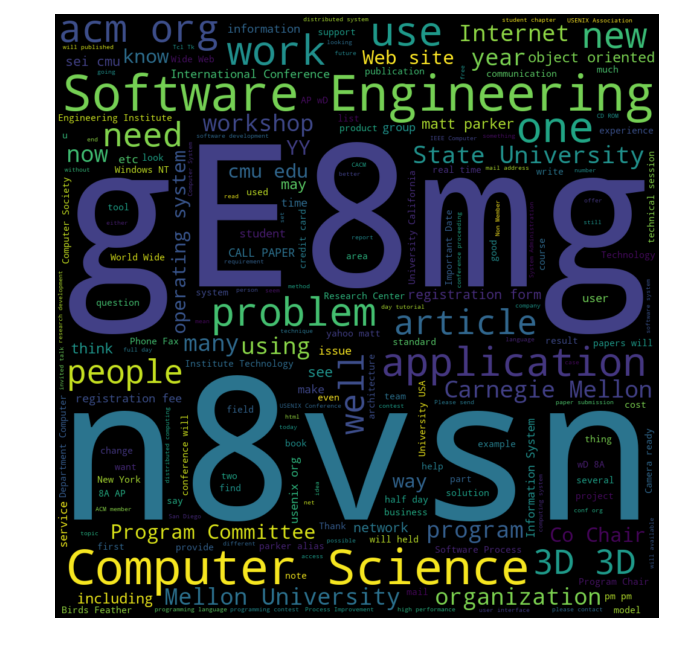

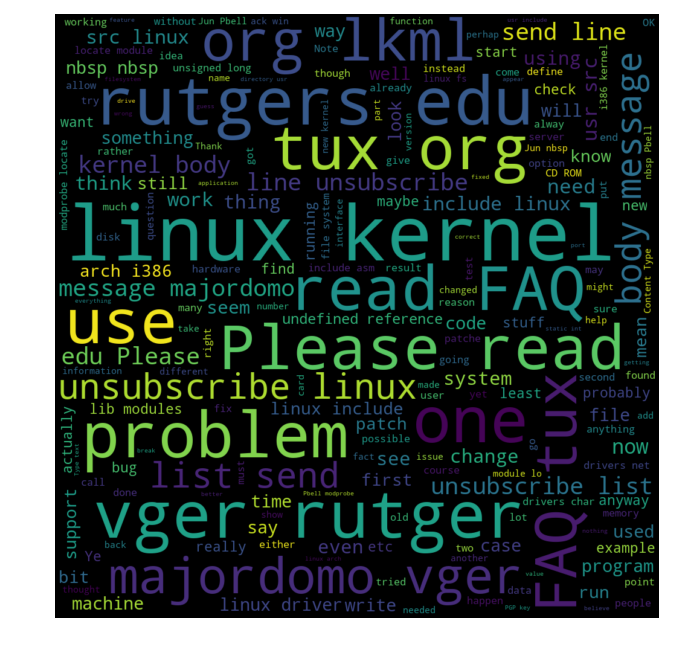

In [43]:
wc = WordCloud(width=1000, height=1000, margin=10).generate(cComp)
plt.figure(figsize=(8,8),dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

wc = WordCloud(width=1000, height=1000, margin=10).generate(cLinux)
plt.figure(figsize=(8,8),dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

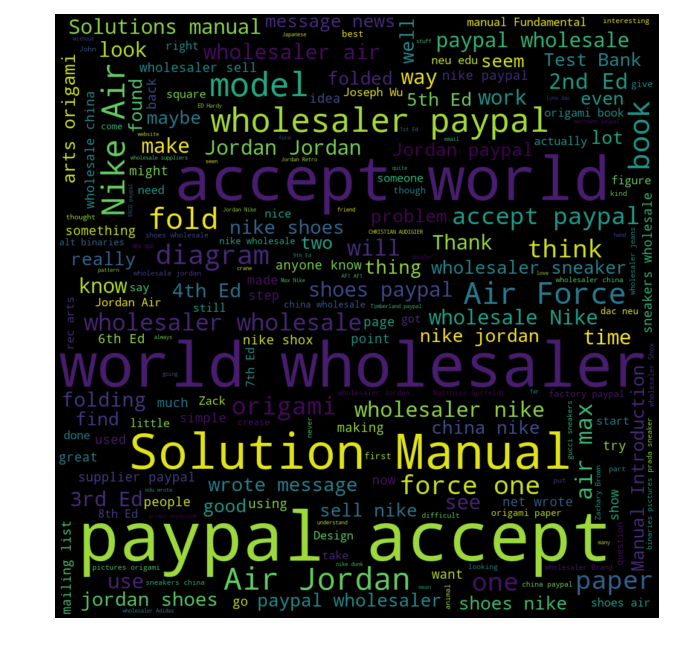

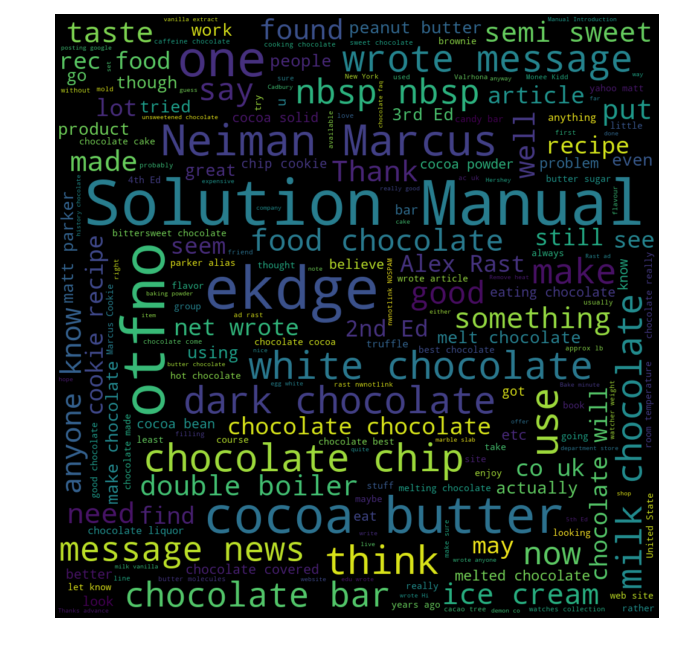

In [44]:
wc = WordCloud(width=1000, height=1000, margin=10).generate(cArts)
plt.figure(figsize=(8,8),dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

wc = WordCloud(width=1000, height=1000, margin=10).generate(cFood)
plt.figure(figsize=(8,8),dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

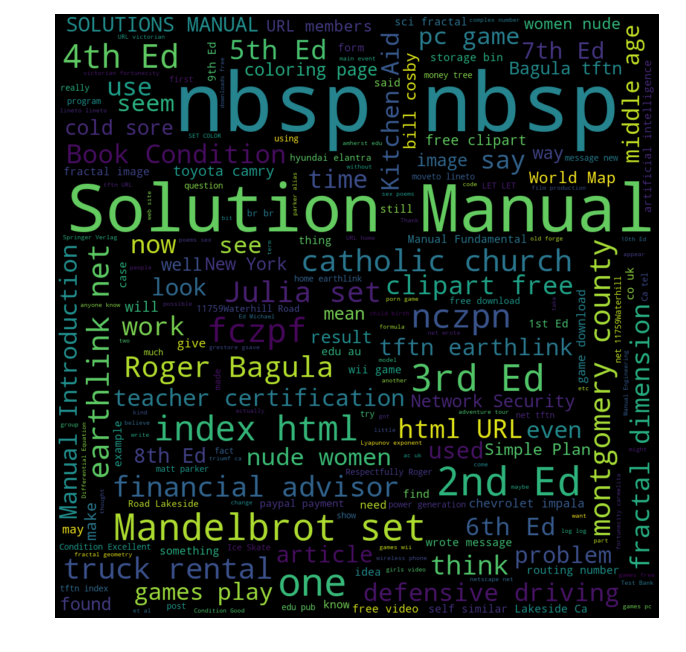

In [45]:
wc = WordCloud(width=1000, height=1000, margin=10).generate(cFract)
plt.figure(figsize=(8,8),dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Question 6: Discussion
I definitely think our data supports the assertion that wordclouds can be like fingerprints, given that they even account for off topic conversations that occur within a dataset. In fact, they may actually be a pretty good tool for spotting fronts for illegal activity posing as a forum. For example, in Fractals I found "girls video" and  "free download" suggesting POSSIBLE illegal activity as well as "nude women" and "catholic church" suggestion quite a bit of off-topic conversation (assuming they didn't somehow link Catholicism to fractals). These items were very small but I would imagine some extra processing could be done to dig more of them out. It appeared that fractals were actually not the most frequent thing discussed, though they were high on the list.

Clearly the Arts origami Usenet was just a way for people to trade Nike Jordans as very little actual origami conversation made it through to the word cloud.

Food, Comp, and Linux looked somewhat as to be expected, but the off target conversation I think is the more interesting bit as it will differentiate this dataset from other sets based on similar topics.